In [1]:
import os
import sys

import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib
from hydra import initialize, compose
from glob import glob

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util

In [2]:
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.repo_dir

figure_dir = os.path.join(repo_dir, 'figures')
array_dir = os.path.join(array_dir, 'sample_skypy_lens')

In [6]:
array_files = glob(array_dir + '/sample_skypy_lens_1_*.npy')
array_list = [np.load(i) for i in array_files]

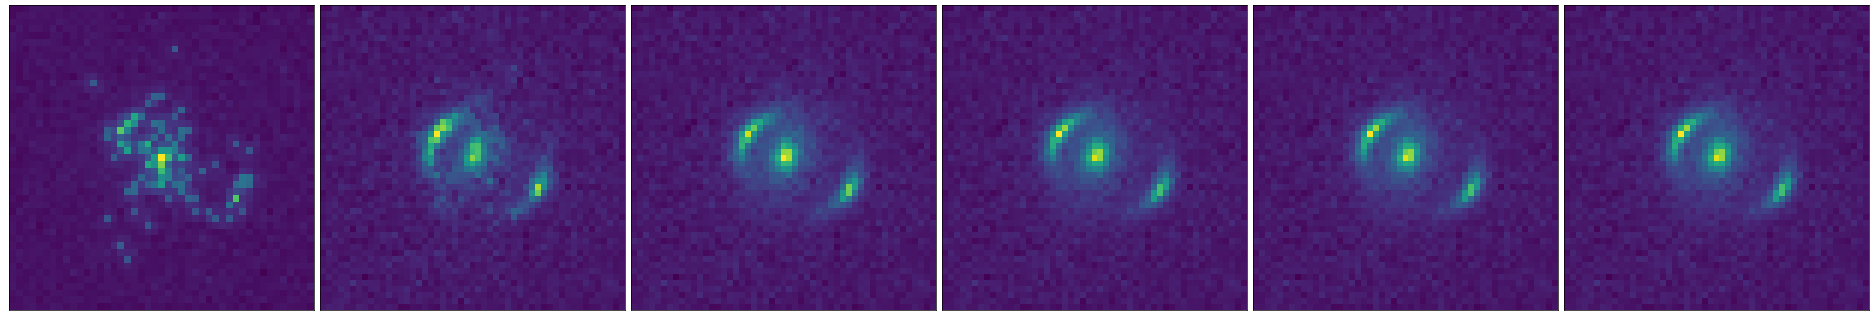

In [7]:
plot.plot_list(array_list)

In [9]:
for array in array_list:
    print(f'{array.shape}')

(45, 45)
(51, 51)
(51, 51)
(51, 51)
(51, 51)
(51, 51)


In [8]:
last_array = array_list[-1]
residual_list = [(last_array - i) for i in array_list]
title_list = [os.path.basename(i) for i in array_files]

ValueError: operands could not be broadcast together with shapes (51,51) (45,45) 

In [ ]:
chi_square_list = []

for array in array_list:
    chi_square_list.append(stats.chi_square(array, last_array))

In [ ]:
chi_square_list = ['$\chi^2 = $' + util.scientific_notation_string(i) for i in chi_square_list]

In [ ]:
num_samples_list = [100, 1000, 10000, 100000, 1000000, 10000000]
title_list = ['{:.0e}'.format(i) + ' samples' for i in num_samples_list]

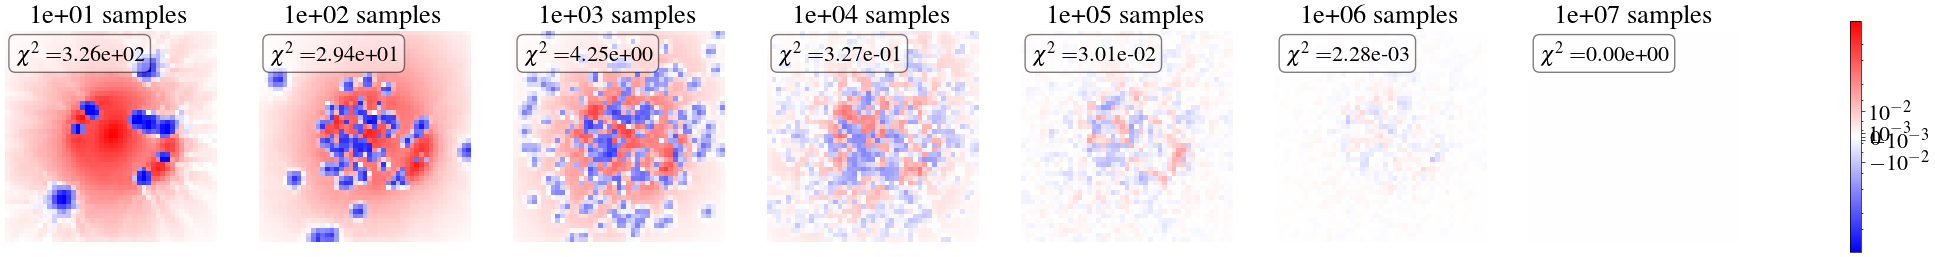

In [ ]:
fontsize = 16

fig, ax = plt.subplots(nrows=1, ncols=len(array_list), figsize=(len(array_list) * 4, 3))
matplotlib.rcParams.update({'font.size': fontsize})

axis = diagnostic_plot.residual_compare(ax, residual_list, title_list, linear_width=0.005)

fig.colorbar(axis, ax=ax, ticks=[-0.01, -0.001, 0, 0.001, 0.01])

# create text boxes
overplot.text_boxes(ax, chi_square_list, fontsize=fontsize)

plt.savefig(os.path.join(figure_dir, 'oversampling.png'))
plt.show()

# Combined

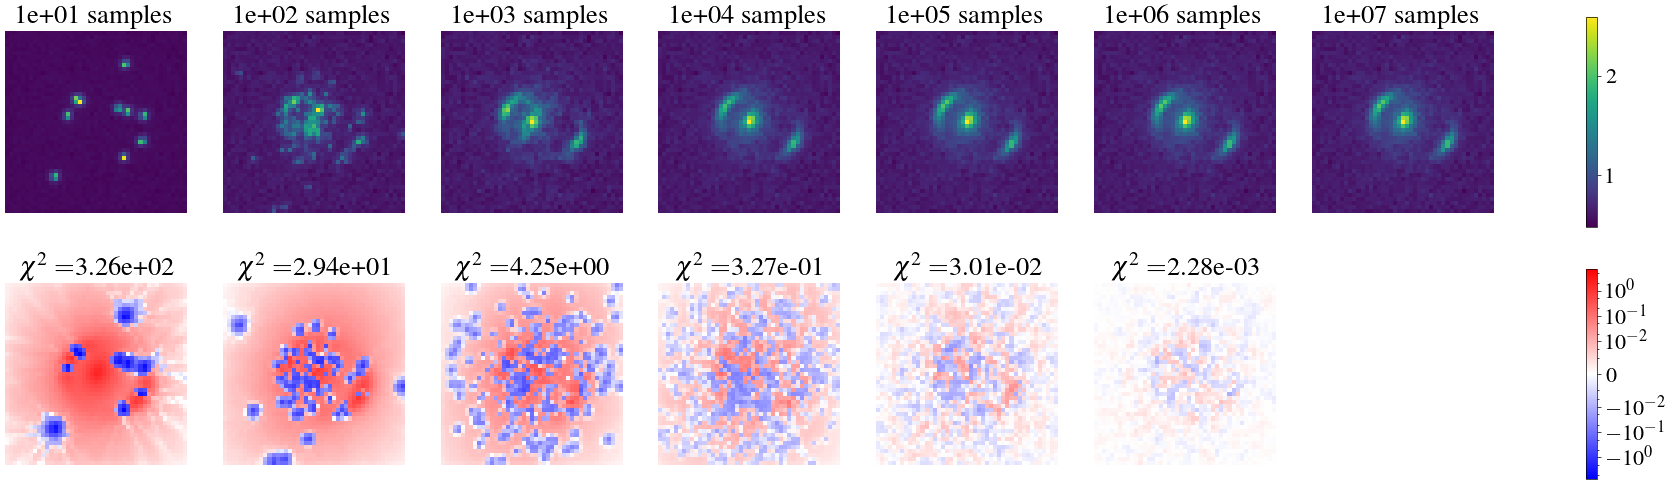

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=len(array_list), figsize=(24, 6))

matplotlib.rcParams.update({'font.size': 16})

for i, array in enumerate(array_list):
    axis_1 = ax[0][i].imshow(array, cmap='viridis')
    ax[0][i].set_title(title_list[i])
    ax[0][i].set_axis_off()

fig.colorbar(axis_1, ax=ax[0])

norm = plot_util.get_norm(array_list, linear_width=0.001)

for i, array in enumerate(residual_list[:-1]):
    axis_2 = ax[1][i].imshow(array, cmap='bwr', norm=norm)
    ax[1][i].set_title(chi_square_list[i])
    ax[1][i].set_axis_off()

# overplot.text_boxes(ax[1], chi_square_list, fontsize=18)

fig.colorbar(axis_2, ax=ax[1], ticks=[-1, -0.1, -0.01, 0, 0.01, 0.1, 1])

ax[1][len(residual_list) - 1].remove()

plt.savefig(os.path.join(figure_dir, 'oversampling.png'))
plt.show()